# Birth death process with individual evolving birth rates

_Jonathan Lindström_

Consider a birth death process where each particle has it's own parameter $x$. The birth rate for the process is

$\lambda_n = \sum_{i=1}^N \rho(x_i)$

Where $\rho(x) > 0$ for all values of $c$. $\rho(x)$ is a rate function (it gives inverse lifetime for a particle in the equivalent branching process model).

The death is simply proportional to the number of particles.

$\mu_n = N\mu$

Whenever a new particle is born it gets

$x_{new} = x_{parent} + Y$ where $Y$ is a random variable and $x_{parent}$ is selected from the extant particles with a probability proportional to $\rho(x_{parent})$.

## Some properties
$\newcommand{\E}{\mathrm{E}}$
$\newcommand{\Var}{\mathrm{Var}}$
Assume that $\E[Y] = 0$. Let $N$ be large. We can then consider the parameters $x$ for the whole population at time $t$ as a random variable, $X_t$, where $f_{X, t}$ is the probaiblity density function for $X_t$ at time $t$. 

The probability distribution for the selected $x_{parent}$ is proportional to $\rho(x) f_{X, t}(x)$.

For a new particle

$\E[X^{(new)}_t] = \E[X^{(parent)}_t] + \E[Y] = \E[X^{(parent)}_t]$

$\E[X^{(parent)}_t] = \frac{1}{\int \rho(x) f_{X, t}(x) dx} \int x \rho(x) f_{X, t}(x) dc$

The new particle will slightly alter $f_{c, t}$. After one birth we get

$\E[X_{t + dt}] = \frac{N}{N + 1}\E[X_t] + \frac{1}{N + 1}\E[X^{(parent)}_t]$

So the change after one birth is

$\E[X_{t + dt}] - \E[X_t] = \frac{N}{N + 1}\E[X_t] + \frac{1}{N + 1}\E[X^{(parent)}_t] - \E[X_t]$

$\E[X_{t + dt}] - \E[X_t] = \frac{N}{N + 1}\E[X_t] + \frac{1}{N + 1}\E[X^{(parent)}_t] - \frac{N + 1}{N + 1}E[X_t]$

$\E[X_{t + dt}] - \E[X_t] = \frac{N\E[X_t] + \E[X^{(parent)}_t] - (N + 1)\E[X_t]}{N + 1}$

$\E[X_{t + dt}] - \E[X_t] = \frac{\E[X^{(parent)}_t] - \E[X_t]}{N + 1}$

The birthrate of new particles is

$\sum_i \rho(x_i)$

which, in this approximation becomes

$N_t \int \rho(x) f_{X, t}(x) dx$

The change in expectation from one birth is

$\frac{d\E[X_t]}{dt} = \frac{1}{dt} \frac{\E[X^{(parent)}_t] - \E[X_t]}{N + 1}$

The average waiting time is the inverse of the the birthrate, so we get:

$\frac{d\E[X_t]}{dt} = \frac{\E[X^{(parent)}_t] - \E[X_t]}{N + 1} N \int \rho(x) f_{X, t}(x) dx$

expand

$\frac{d\E[X_t]}{dt} = \frac{\frac{1}{\int \rho(x) f_{X, t}(c) dx} \int x \rho(x) f_{X, t}(x) dx - \int x f_{X, t}(x) dx}{N + 1} N \int \rho(x) f_{X, t}(x) dx$

$\frac{d\E[X_t]}{dt} = \frac{N}{N + 1} \left[ \int x \rho(x) f_{X, t}(x) dx - \int x f_{X, t}(c) dc \int \rho(x) f_{X, t}(x) dx \right]$

This is difficult to integrate unless we can assume that the shape of $f_{X, t}$ does not change with time.

---

If we exclude the effects of the random variation ($Y$), $f_{X, t}$ converges to satisfy

$f_{X, t}(x) \propto \rho(x)f_{X, t}(x)$ 

which has a general solution in the dirac delta function. With noise included we can find the stationary distribution numerically by iterating

$f_{n + 1} = f_Y * (f_n \rho)$

---

What about how variance changes over time? $X$ and $Y$ are uncorrelated so

$\Var[X^{(new)}_t] = \Var[X^{(parent)}_t + Y] = \Var[X^{(parent)}_t] + \Var[Y]$

where $\Var[Y]$ is assumed to be known.

$\Var[X^{(parent)}_t] = \E[(X^{(parent)}_t)^2] - \E[X^{(parent)}_t]^2$

$\Var[X^{(parent)}_t] = \frac{1}{\int \rho(x) f_{X, t}(x) dx} \int x^2 \rho(x) f_{X, t}(x) dc - \left( \frac{1}{\int \rho(x) f_{X, t}(x) dx} \int x \rho(x) f_{X, t}(x) dc \right)^2$

However, it is can be understood that the time evolution of the variance also depends on the time evolution of $f_{c, t}$, so unless we can describe that this is likely not helpful.

---

Some simulations below to test these concepts. I have synchronized births with deaths to reduce the computational burden (killing a cell each time one is born to prevent the population size from changing). However, deaths shouldn't really matter for what is described above.

In [97]:
# Simulation example using a modified Gillespies algorithm

import numpy as np

class SBP:
    # Synchronises a death with every birth, thus keeping the
    # number of particles constant
    def __init__(self, particles, rate_function, noise_function):
        # list of floating point numbers specifying 
        # internal parameter x for each extant particle
        self.particles = np.array(particles)
        # function that takes self.particles and returns
        # the growth rate of each particle
        self.rate_function = rate_function
        # funciton that returns a value that is added
        # to x for a newly born particle
        self.noise_function = noise_function
        
        # Initial setup
        self.t = 0
        self.rates = rate_function(self.particles)
        self.birth_rate = np.sum(self.rates)
    
    def simulate(self, increment_time):
        end_time = self.t + increment_time
        while self.t < end_time:
            # because of synchronization birth rate is the only important rate
            total_rate = self.birth_rate
            
            # increment time dependent on total rate
            self.t += np.random.exponential(1/total_rate)
            
            # replicate random particle
            # normalize rates so that we can use it as probabilities to
            # select the dividing particle
            selection_probabilities = self.rates / self.birth_rate
            select_particle = np.random.choice(self.particles.size, 1, p=selection_probabilities)
            new_particle = self.particles[select_particle] + self.noise_function()
            new_rate = self.rate_function(np.array(new_particle))[0]
            self.particles = np.append(self.particles, new_particle)
            self.rates = np.append(self.rates, new_rate)
            self.birth_rate += new_rate
            
            # kill random particle
            select_particle = np.random.choice(self.particles.size)
            self.particles = np.delete(self.particles, select_particle)
            self.birth_rate -= self.rates[select_particle]
            self.rates = np.delete(self.rates, select_particle) 

In [101]:
# sample process

# simulate and save data every 0.1 timesteps
T_END = 25
STEP = 0.1
ALPHA = 3
BETA = 17
NUMBER = 1000
MAX_RATE = 1.0
NOISE_SIGMA = 0.05

BEST_X = ALPHA/(ALPHA + BETA)
def rate(x):
    tmp = np.maximum(x**ALPHA*(1 - x)**BETA, 0) \
          / (ALPHA**ALPHA*BETA**BETA*(ALPHA + BETA)**(-ALPHA - BETA)) \
          * MAX_RATE
    tmp[x <= 0] = 0
    tmp[x >= 1] = 0
    return tmp

def noise(x):
    return 1/np.sqrt(2*np.pi*NOISE_SIGMA**2) * np.exp(-x**2/(2*NOISE_SIGMA**2))
    
def noise_rv():
    return np.random.normal(0, NOISE_SIGMA)

# Create simulator
bp = SBP(np.random.normal(0.5, 0.1, NUMBER), rate, noise_rv)

ts = [bp.t]
Ns = [bp.particles.size]
xs = [bp.particles[:]]

# Simulate in small increments
for i in range(int(T_END / STEP)):
    bp.simulate(STEP)
    
    ts.append(bp.t)
    Ns.append(bp.particles.size)
    xs.append(bp.particles[:])

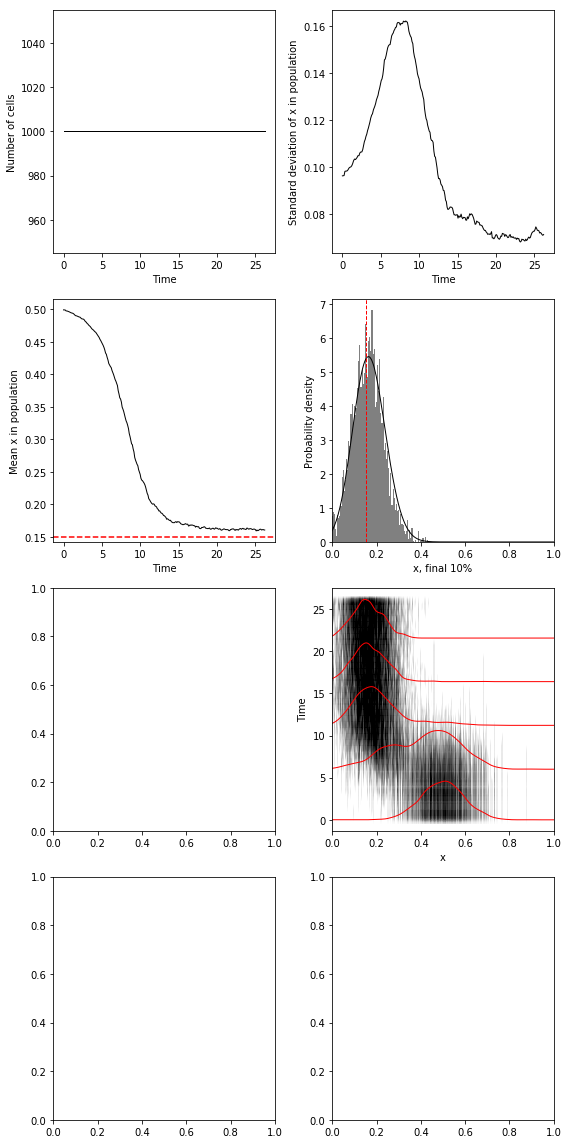

In [102]:
# plot results

import matplotlib.pyplot as plt
from scipy.integrate import simps
from scipy.stats import gaussian_kde

XMIN = 0
XMAX = 1

fig, axs = plt.subplots(nrows=4, ncols=2)
fig.set_size_inches(8, 16)

# population size over time
axs[0][0].plot(ts, Ns, color='k', linewidth=1)
axs[0][0].set_xlabel('Time')
axs[0][0].set_ylabel('Number of cells')

# mean x over time
axs[1][0].plot(ts, [np.mean(x) for x in xs], color='k', linewidth=1)
axs[1][0].axhline(BEST_X, linestyle='--', color='red')
axs[1][0].set_xlabel('Time')
axs[1][0].set_ylabel('Mean x in population')

# variance of x over time
axs[0][1].plot(ts, [np.sqrt(np.var(x)) for x in xs], color='k', linewidth=1)
axs[0][1].set_xlabel('Time')
axs[0][1].set_ylabel('Standard deviation of x in population')

# histogram of x for final 10% of time
# gather data
final_xs = []
for x in xs[int(len(xs)*0.9):]:
    final_xs.extend(x)
# find expected distribution numercally
x_num = np.linspace(-2, 2, 1000)
d = [1]*x_num.size
n = noise(x_num)
for i in range(100):
    d = d*rate(x_num)
    d = np.convolve(d, n, mode='same')
d /= simps(d, x=x_num)
axs[1][1].hist(final_xs, bins=100, density=True, color='grey')
axs[1][1].plot(x_num, d, color='k', linewidth=1.0)
axs[1][1].axvline(BEST_X, linestyle='--', color='red', linewidth=1.0)
axs[1][1].set_xlim((XMIN, XMAX))
axs[1][1].set_xlabel('x, final 10%')
axs[1][1].set_ylabel('Probability density')

# density over time rugplot
for t, x in zip(ts, xs):
    axs[2][1].plot(x, [t]*x.size, '|', color='k', alpha=0.01)
x_kde = np.linspace(-2, 2, 1000)
kde_skip = 51
for t, x in list(zip(ts[::kde_skip], xs[::kde_skip])):
    kde = gaussian_kde(x, 0.2)
    y_kde = kde.evaluate(x_kde)
    y_kde /= np.max(y_kde) / kde_skip / STEP / 0.9
    axs[2][1].plot(x_kde, y_kde + t, color='r', linewidth=1)
axs[2][1].set_xlim((XMIN, XMAX))
axs[2][1].set_xlabel('x')
axs[2][1].set_ylabel('Time')

plt.tight_layout()
plt.show()

In [64]:
# old simulation code
# Simulation example using a modified Gillespies algorithm
# Not a very good implementation

import numpy as np

class SBP:
    def __init__(self, particles, factor, alpha, beta, perturb):
        # list of floating point numbers specifying 
        # internal parameter for each extant particle
        self.particles = particles
        self.t = 0
        self.factor = factor
        self.alpha = alpha
        self.beta = beta
        self.optimum = 0
        self.perturb = perturb
    
    def simulate(self, increment_time):
        end_time = self.t + increment_time
        while self.t < end_time:
            # calculate rates
            rates = np.array(self.particles)
            rates = self.factor*rates**self.alpha*(1 - rates)**self.beta
            rates[self.particles < 0] = 0
            rates[self.particles > 1] = 0
            
            # increment time dependent on total rate
            # total rate is sum of birth rates + sum of death rates
            total_rate = np.sum(rates)
            self.t += np.random.exponential(1/total_rate)
            
            # replicate random particle
            # normalize rates so that we can use it as probabilities to
            # select the dividing particle
            rates /= np.sum(rates)
            select_particle = np.random.choice(self.particles.size, 1, p=rates)
            select_lambda = self.particles[select_particle]
            self.particles = np.append(self.particles, select_lambda + \
                                       np.random.normal(0, self.perturb))
            
            # kill random particle
            select_particle = np.random.choice(self.particles.size)
            self.particles = np.delete(self.particles, select_particle)
            

0.00021300780363970844
4694.663683267903
[1.]


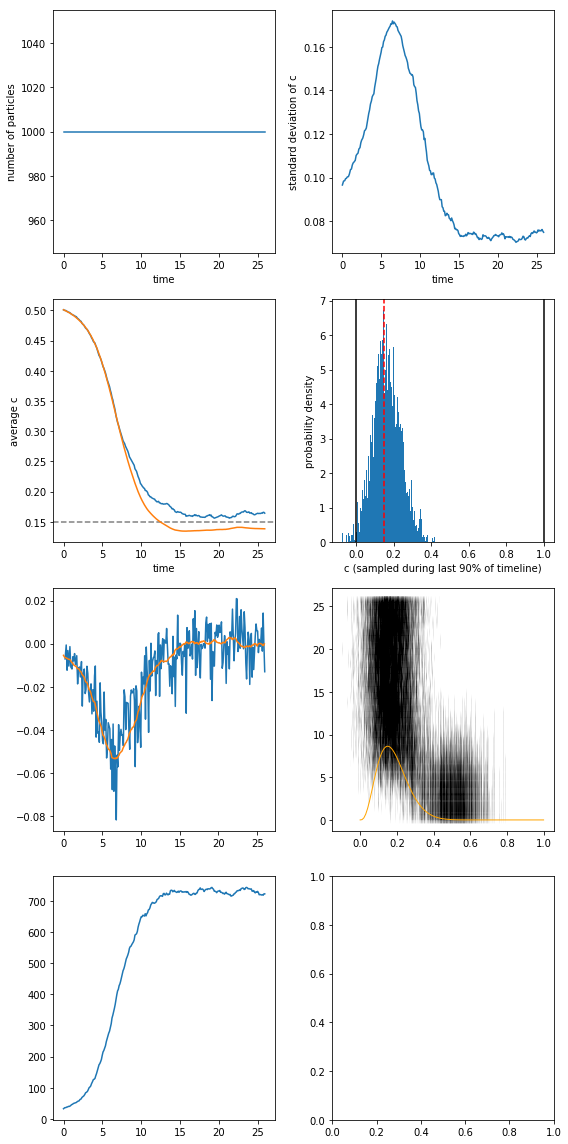

In [65]:
# sample process

import matplotlib.pyplot as plt
from scipy.integrate import simps

# simulate and save data every 0.1 timesteps
T_END = 25
OPTIMUM = 0.5
SIGMA = 0.1
MU = 0.5
ALPHA = 3
BETA = 17
PERTURB = 0.05
NUMBER = 1000
FACTOR = 1/(ALPHA**ALPHA*BETA**BETA*(ALPHA + BETA)**(-ALPHA - BETA))
print(ALPHA**ALPHA*BETA**BETA*(ALPHA + BETA)**(-ALPHA - BETA))
print(1/(ALPHA**ALPHA*BETA**BETA*(ALPHA + BETA)**(-ALPHA - BETA)))
# bp = SBP(np.linspace(0, 1, NUMBER), FACTOR, ALPHA, BETA, PERTURB)
bp = SBP(np.random.normal(0.5, 0.1, NUMBER), FACTOR, ALPHA, BETA, PERTURB)
bp.optimum = OPTIMUM

def rate(c):
    tmp = np.maximum(c**ALPHA*(1 - c)**BETA, 0)
    tmp[c <= 0] = 0
    tmp[c >= 1] = 0
    return tmp

print(rate(np.array([ALPHA/(ALPHA + BETA)])) * FACTOR)

x = []
N = []
rate_mean = []
rate_variance = []
params = []
theory_derivative = []
theory_integrated = []
param_timeline = []
total_rate = []
for i in range(T_END * 10):
    x.append(bp.t)
    N.append(bp.particles.size)
    rate_mean.append(np.mean(bp.particles))
    rate_variance.append(np.var(bp.particles))
    param_timeline.append(bp.particles[:])
    
    # calculate derivative of mean c according to theory above
    c = np.array(bp.particles)
    r = rate(c)
    r *= FACTOR
    total_rate.append(np.sum(r))
    rc = r*c
#     theory_derivative.append((np.sum(rc)/np.sum(r) - np.mean(c))*NUMBER/(NUMBER + 1)*np.sum(r)/NUMBER)
    theory_derivative.append((np.sum(rc) - np.mean(c)*np.sum(r))/(NUMBER + 1))
#     theory_derivative.append((np.sum(rc) - np.sum(c)*np.sum(r)/NUMBER)/(NUMBER + 1))
    #   (np.sum(rc)/np.sum(r) - np.mean(c))*NUMBER/(NUMBER + 1)*np.sum(r)/NUMBER
    # = N/(N + 1) * ( np.sum(rc)*np.sum(r)/np.sum(r)/N - np.mean(c)*np.sum(r)/N )
    # = N/(N + 1) * ( np.sum(rc)/N - np.mean(c)*np.sum(r)/N )
    # = ( np.sum(rc) - np.mean(c)*np.sum(r) ) / (N + 1)
    # = ( np.sum(rc) - np.sum(c)*np.sum(r)/N ) / (N + 1)
    theory_integrated.append(simps(theory_derivative, x=x))
    
    if i > T_END*9:
        params.extend(bp.particles)
    bp.simulate(0.1)
    
x = np.array(x)
rate_mean = np.array(rate_mean)
    
# plot results
fig, axs = plt.subplots(nrows=4, ncols=2)
fig.set_size_inches(8, 16)
axs[0][0].plot(x, N)
axs[1][0].plot(x, rate_mean)
axs[1][0].axhline(ALPHA/(ALPHA + BETA), linestyle='--', color='grey')
axs[0][1].plot(x, np.sqrt(rate_variance))
axs[1][1].hist(params, bins=100, density=True)
axs[1][1].axvline(0, color='k')
axs[1][1].axvline(1, color='k')
axs[1][1].axvline(ALPHA/(ALPHA + BETA), linestyle='--', color='red')
axs[1][0].plot(x, theory_integrated + rate_mean[0])

num_deriv = (rate_mean[1:] - rate_mean[:-1]) / (x[1:] - x[:-1])
axs[2][0].plot(x[1:] + 0.5*np.mean(x[1:] - x[:-1]), num_deriv)
axs[2][0].plot(x, theory_derivative)

for i, par in enumerate(param_timeline):
    axs[2][1].plot(par, [x[i]]*len(par), '|', color='k', alpha=0.01)
axs[2][1].plot(np.linspace(0, 1, 100), rate(np.linspace(0, 1, 100))*FACTOR*max(x)/3, 
               color='orange', linewidth=1.0)
    
axs[3][0].plot(x, total_rate)

axs[0][0].set_xlabel('time')
axs[0][0].set_ylabel('number of particles')
axs[1][0].set_xlabel('time')
axs[1][0].set_ylabel('average c')
axs[0][1].set_xlabel('time')
axs[0][1].set_ylabel('standard deviation of c')
axs[1][1].set_xlabel('c (sampled during last 90% of timeline)')
axs[1][1].set_ylabel('probability density')

plt.tight_layout()
plt.show()

[0.16216216]


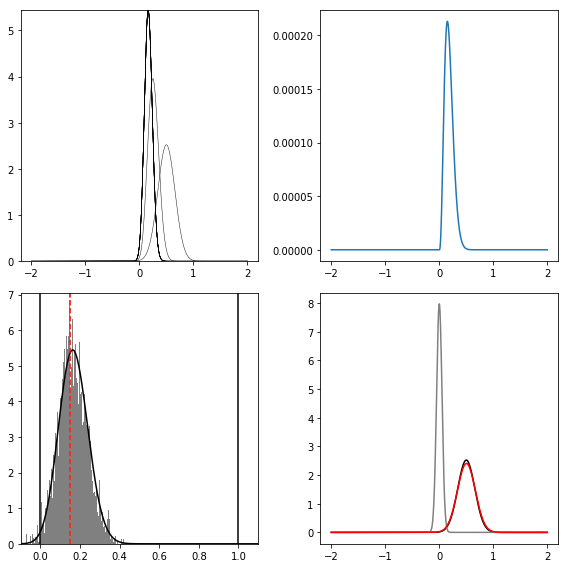

In [66]:
import matplotlib.pyplot as plt
import numpy as np
from scipy.integrate import simps
import matplotlib.cm as cm

# ALPHA = 2
# BETA = 7
ITERS = 100
SKIP = 10
FACTOR = 1/(ALPHA**ALPHA*BETA**BETA*(ALPHA + BETA)**(-ALPHA - BETA))

def rate(c):
    tmp = np.maximum(c**ALPHA*(1 - c)**BETA, 0)
    tmp[c <= 0] = 0
    tmp[c >= 1] = 0
    return tmp

distributions = []
rates = []
x = np.linspace(-2, 2, 1000)
d = np.exp(-(x - 0.5)**2/0.05)
d /= simps(d, x=x)
distributions.append(d[:])
rates.append(rate(x))
noise = np.exp(-x**2/(2*0.05**2))
noise /= simps(noise, x=x)

for i in range(ITERS - 1):
    d = d*rate(x)*FACTOR
    d = np.convolve(d, noise, mode='same')
    d /= simps(d, x=x)
    
    if i%SKIP != 0:
        continue
    distributions.append(d[:])
    rates.append(rate(x))

fig, axs = plt.subplots(ncols=2, nrows=2)
fig.set_size_inches(8, 8)
for i, y1, y2 in zip(range(len(distributions)), distributions, rates):
    axs[0][0].plot(x, y1, color=cm.Greys(int((i + 100)/(len(distributions) + 100)*255)), linewidth=0.5)
    axs[0][0].set_ylim(0, max(axs[0][0].get_ylim()[1], max(y1)))
    
axs[0][1].plot(x, rates[0])
axs[1][0].axvline(ALPHA/(ALPHA + BETA), linestyle='--', color='lightgrey')
axs[1][0].plot(x, distributions[-1], color='k')
axs[1][0].set_xlim(-0.1, 1.1)

axs[1][0].hist(params, bins=100, density=True, color='grey')
axs[1][0].axvline(0, color='k')
axs[1][0].axvline(1, color='k')
axs[1][0].axvline(ALPHA/(ALPHA + BETA), linestyle='--', color='red')

y1 = distributions[0]
y2 = noise
y3 = np.convolve(y1, y2, mode='same')

y1 /= simps(y1, x=x)
y2 /= simps(y2, x=x)
y3 /= simps(y3, x=x)

axs[1][1].plot(x, y1, color='black')
axs[1][1].plot(x, y2, color='grey')
axs[1][1].plot(x, y3, color='red')


print(x[distributions[-1] == np.max(distributions[-1])])
plt.tight_layout()
plt.show()